# Cartographie sous python

## 1 La création de carte

Création de cartes  
Le package folium est une interface entre python et la librairie leaflet. Elle s'utilise très facilement, comme nous pouvons le voir ci-dessous pour la création d'une carte zoomée sur la capitale. Les coordonnées indiquées sont la latitude et la longitude de Paris.

Tuto utile :  https://python-visualization.github.io/folium/quickstart.html#Markers

Pour aller plus loin, le choropeth : https://python-graph-gallery.com/choropleth-map/
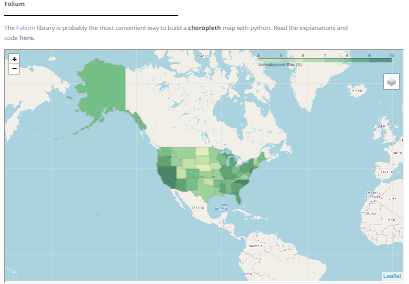


In [137]:
!pip install folium
import folium
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12, name = "¨Paris")

Affichons la carte de Paris

In [114]:
paris

## 2 Les marqueurs

La fonction Marker() permet d'ajouter une marque sur la carte pour signifier un emplacement précis. Il est possible de spécifier un contenu à afficher (sous la forme d'un pop-up) lorsque l'utilisateur va cliquer sur le marqueur. Celui-ci sera placé à la localisation fournie en premier, au format [latitude, longitude]. Ce contenu est spécifié dans l'argument popup (ici, une simple chaîne de caractères, mais cela peut être plus élaboré). Il est aussi possible customiser l'icône du marqueur. Une fois ce marqueur créé, il faut l'ajouter à la carte, via la fonction add_to().

Afficher un marqueur à la position [48.856578, 2.351828]

In [ ]:
marker_hotel = folium.Marker(
    location=([45, 5]), 
    popup='autre chose', 
    tooltip='test', 
    name='hotel'
)

marker_hotel.add_to(paris)

Modifier l'icone avec https://getbootstrap.com/docs/3.3/components/

In [148]:
marker_hotel = folium.Marker(
    location=([48.856578, 2.351828]), 
    popup='Mon premier marqueur', 
    tooltip='Hotel de ville de Paris', 
    name='hotel',
    icon=folium.Icon(color='red', icon='glyphicon-hand-down')
)

marker_hotel.add_to(paris)
paris

Tentative de récupération de l'id ou du name du marker pour pouvoir le supprimer. Mais il ne semle pas y avoir cette fonction... C'est bizarre. Je pense que c'est possible, mais je dois avancer. au moins j'ai découverts ce qui suit.

Pour supprimer un marker. faire `del mon_marker`

In [157]:
paris

In [127]:
paris.to_dict() # description de la map et de ce qui la compose (children) sous forme de dico

OrderedDict([('name', 'Map'),
             ('id', 'd00d9ea36d6d45409a07d5e87b485cf1'),
             ('children',
              OrderedDict([('openstreetmap',
                            OrderedDict([('name', 'TileLayer'),
                                         ('id',
                                          'dc66487996f94368b903d58e90e25e8d'),
                                         ('children', OrderedDict())])),
                           ('marker_d4baa64229ec403691acf858f7a4622d',
                            OrderedDict([('name', 'Marker'),
                                         ('id',
                                          'd4baa64229ec403691acf858f7a4622d'),
                                         ('children',
                                          OrderedDict([('popup_4cf46b61e59e4ea2bff7122aa89f683c',
                                                        OrderedDict([('name',
                                                                      'Popup'),
         

In [121]:
paris.to_json()

'{"name": "Map", "id": "d00d9ea36d6d45409a07d5e87b485cf1", "children": {"openstreetmap": {"name": "TileLayer", "id": "dc66487996f94368b903d58e90e25e8d", "children": {}}, "marker_d4baa64229ec403691acf858f7a4622d": {"name": "Marker", "id": "d4baa64229ec403691acf858f7a4622d", "children": {"popup_4cf46b61e59e4ea2bff7122aa89f683c": {"name": "Popup", "id": "4cf46b61e59e4ea2bff7122aa89f683c", "children": {}}, "tooltip_b469c5a478e44e9b863a2898bc9a480f": {"name": "Tooltip", "id": "b469c5a478e44e9b863a2898bc9a480f", "children": {}}}}, "marker_c4991154e75842aa9edefdcca9a64d4f": {"name": "Marker", "id": "c4991154e75842aa9edefdcca9a64d4f", "children": {"popup_c70e40126c1e4cdd8cdca6b9ec4b7590": {"name": "Popup", "id": "c70e40126c1e4cdd8cdca6b9ec4b7590", "children": {}}, "tooltip_4bd4533c5f2d481a89cdb1bd7474cd95": {"name": "Tooltip", "id": "4bd4533c5f2d481a89cdb1bd7474cd95", "children": {}}}}}}'

## 3 Les cercles

La fonction CircleMarker() permet elle de créer des cercles, en donnant la localisation du centre et le rayon (via le paramètre radius). Idem que pour Marker(), on peut spécifier le contenu de la popup affichée lors d'un clic, et il est nécessaire de l'ajouter à la carte. Il est possible aussi de spécifier la couleur du cercle (via color) et la couleur de remplissage (via fillColor).

Afficher un cercle jaune à la position [48.856578, 2.351828]

In [159]:
folium.CircleMarker(location=[48.856578, 2.351828], tooltip='Wow cool, je suis un cercle').add_to(paris)
paris

## 4 Les informations géographiques

Pour pouvoir ajouter ces informations, nous allons importer les contours des 20 arrondissements parisiens disponibles en téléchargement sur [cette page](https://opendata.paris.fr/explore/dataset/arrondissements/export/?disjunctive.c_ar&disjunctive.c_arinsee&disjunctive.l_ar&location=13,48.85156,2.32327). Les données à récupérer sont celles au format GeoJSON. 
Pour lire ce fichier, il faudra importer la librairie json

In [160]:
import json

In [215]:
dict_GeoJson_ardt_paris = json.load(open('./Data/arrondissements.geojson'))
dict_GeoJson_ardt_paris

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[2.339776543083362, 48.882029347225085],
      [2.33981604470311, 48.882023575505244],
      [2.341575431473961, 48.882367507092404],
      [2.341888795634041, 48.88242876126407],
      [2.341988741284629, 48.88244829819207],
      [2.343903993171748, 48.88282265597415],
      [2.3444366876695772, 48.882930576205595],
      [2.344446697031166, 48.882932604143186],
      [2.3445147533814152, 48.88294587136562],
      [2.346629952252191, 48.883358163908525],
      [2.346656128621727, 48.88336326566054],
      [2.346660904646249, 48.88336419734837],
      [2.34677524250487, 48.8833864824888],
      [2.346950387627314, 48.88342061872497],
      [2.347000796674596, 48.88342663229518],
      [2.347134323137054, 48.88344255916091],
      [2.347240744321025, 48.88345525339857],
      [2.348816337834741, 48.88364318120608],
      [2.349336904647282, 48.88370526550675],
      [

Vérifions que nous avons bien que nous avons les 20 arrondissements de Paris dans l'objet features, qui est une list.


In [201]:
len(dict_GeoJson_ardt_paris['features'])

20

Dans chaque objet de cette liste, nous disposons aussi de différents objets de type Feature. Regardez-les avec la fonction keys()

In [195]:
dict_GeoJson_ardt_paris.keys()

dict_keys(['type', 'features'])

Il y a un 'properties' par item, il faut donc d'abord en sélectionner un pour obtenir ses properties.
Utiliser un json viewer pour ça. http://jsonviewer.stack.hu/  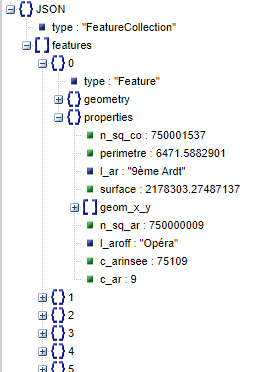

In [212]:
dict_GeoJson_ardt_paris["features"][0]['properties']

{'n_sq_co': 750001537,
 'perimetre': 6471.5882901,
 'l_ar': '9ème Ardt',
 'surface': 2178303.27487137,
 'geom_x_y': [48.8771635173, 2.33745754348],
 'n_sq_ar': 750000009,
 'l_aroff': 'Opéra',
 'c_arinsee': 75109,
 'c_ar': 9}

Dans le champs properties, il y a différentes informations utiles, dont les coordonnées longitude et latitude du centre.

{'n_sq_co': 750001537,
 'perimetre': 8282.01188584,
 'l_ar': '11ème Ardt',
 'surface': 3665441.55248808,
 'geom_x_y': [48.8590592213, 2.3800583082],
 'n_sq_ar': 750000011,
 'l_aroff': 'Popincourt',
 'c_arinsee': 75111,
 'c_ar': 11}

## 3 Marqueurs par arrondissements

Avec les informations contenues dans geom_x_y, nous allons pouvoir ajouter un marqueur pour chaque arrondissement, en mettant dans la popup, le nom de l'arrondissement.

In [23]:
paris_arr_marker = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
for arr in dict_GeoJson_ardt_paris["features"]:
    prop = arr["properties"]
    folium.Marker(prop["geom_x_y"], popup = prop["l_ar"]).add_to(paris_arr_marker)
paris_arr_marker

Faites maintenant la même chose avec les cercles pour chacun des arrondissements

## 4 Le choroplète

Pour cela, nous devons devons utiliser la fonction choropleth() de la carte créée. Nous passons dans le paramètre geo_str les données contenues dans le fichier GeoJSON importées plus haut.

In [ ]:
import choropleth_geojson as cg

## 5 Aller plus loin

Effectuer une cartographie avec une couleur différente pour chaque arrondissement